# 🧠 R² Score (Coefficient of Determination)

## Definition
The **R² score** is a statistical measure that shows how well the regression model explains the variation of the dependent variable.  
It indicates the proportion of total variation in the target variable that is explained by the model.

In simple terms, **R²** tells us **how well the model fits the data**.

---

## 📊 Formula

$$
R^2 = \frac{ESS}{TSS} = 1 - \frac{RSS}{TSS}
$$

Where:

- **TSS (Total Sum of Squares)** — measures the total variation in the actual (observed) data:  
  $$
  TSS = \sum (y_i - \bar{y})^2
  $$

- **ESS (Explained Sum of Squares)** — measures the variation explained by the regression model:  
  $$
  ESS = \sum (\hat{y}_i - \bar{y})^2
  $$

- **RSS (Residual Sum of Squares)** — measures the unexplained variation (errors):  
  $$
  RSS = \sum (y_i - \hat{y}_i)^2
  $$

---

## 🧩 Interpretation

- **R² = 1** → Perfect fit (the model explains all variability).  
- **R² = 0** → The model explains no variability.  
- **0 < R² < 1** → The model explains some part of the variability.  
- **R² < 0** → The model performs worse than a simple mean-based model.

---

## ✅ Summary
R² measures the **goodness of fit** of a regression model using:
$$
R^2 = 1 - \frac{RSS}{TSS}
$$
Higher R² means better model performance.


In [18]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [19]:
data = pd.read_csv('Experience-Salary.csv')

In [20]:
data.head()

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


In [21]:
data = data.sample(30)

In [22]:
X = data['exp(in months)'].values
Y = data['salary(in thousands)'].values

## TSS(Total Sum of Squares)

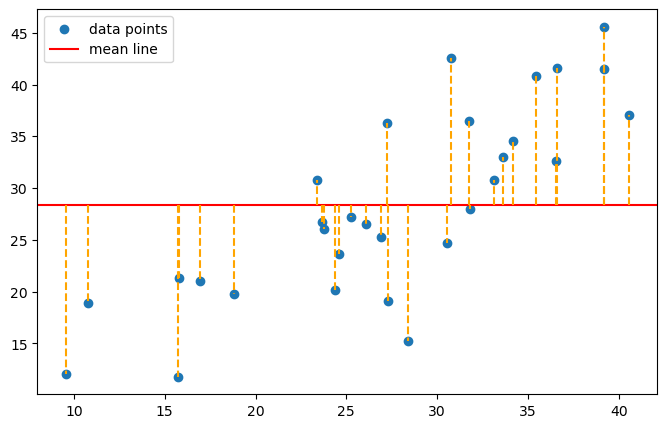

In [23]:
plt.figure(figsize=(8, 5))
plt.scatter(X, Y, label='data points')
plt.axhline(Y.mean(), color = 'red', label='mean line')
for i in range(len(X)):
    plt.vlines(X[i], Y.mean(), Y[i], colors='orange', linestyles='dashed')
plt.legend()

## RSS(Residual Sum of Squares)

In [24]:
new_X =  X.reshape(-1,1)
lr = LinearRegression()
lr.fit(new_X, Y)
y_pred = lr.predict(new_X)
rss = Y - y_pred  

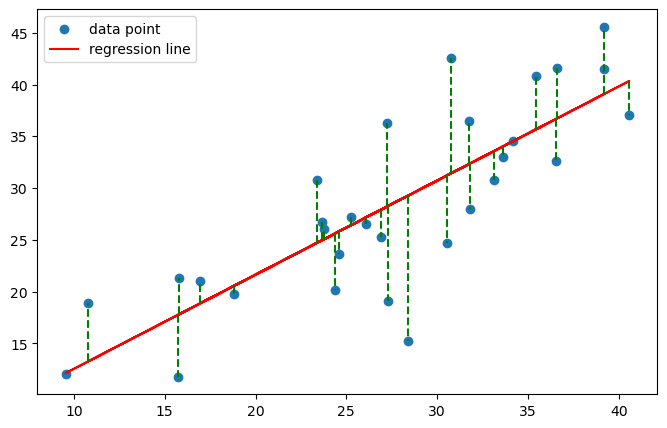

In [25]:
plt.figure(figsize=(8, 5))
plt.scatter(X, Y, label = 'data point')
plt.plot(X, y_pred, color='red', label ='regression line')
for i in range(len(X)):
    plt.vlines(X[i], y_pred[i], Y[i], colors='green', linestyles='dashed')
plt.legend()

## ESS(Explain Sum of Squars)

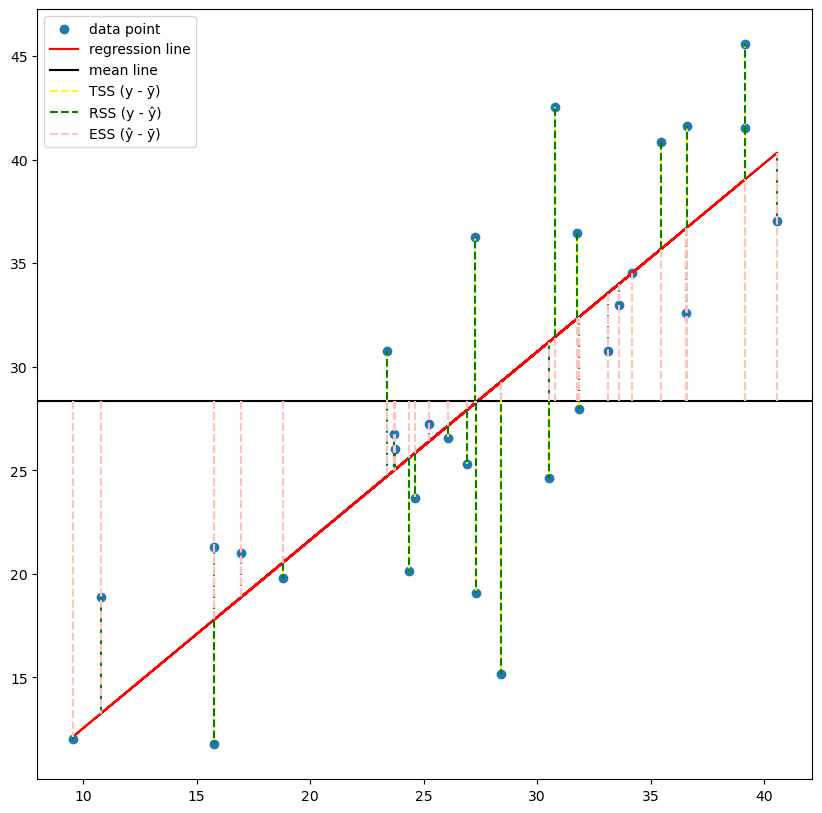

In [37]:
plt.figure(figsize=(10, 10))
plt.scatter(X, Y, label = 'data point')
plt.plot(X, y_pred, label = 'regression line', color='red')
plt.axhline(Y.mean(), label='mean line', color ='black')
for i in range(len(X)):
    # TSS = (y_i - y_mean)^2
    plt.vlines(X[i], Y.mean(), Y[i], colors='yellow', linestyles='dashed', label='TSS (y - ȳ)' if i == 0 else "")
    
    # RSS = (y_i - ŷ_i)^2
    plt.vlines(X[i], y_pred[i], Y[i], colors='green', linestyles='dashed',label='RSS (y - ŷ)' if i == 0 else "")
    
    # ESS = (ŷ_i - y_mean)^2
    plt.vlines(X[i], Y.mean(), y_pred[i], colors='pink', linestyles='dashed',label='ESS (ŷ - ȳ)' if i == 0 else "")
    
plt.legend()

In [44]:
def r2(y, y_pred):
    rss = 0
    tss = 0
    for i in range(len(y)):
        rss += (y[i] - y_pred[i]) ** 2
        tss += (y[i] - y.mean()) ** 2
    return 1 - (rss / tss)

In [45]:
r2(Y, y_pred)

0.6568821779196454

In [46]:
r2_score(Y, y_pred)

0.6568821779196452